In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
dfClean = pd.read_csv('data/compiledData/dfCleanMortes.csv')
# dfClean = pd.read_csv('dfCleanMortes.csv')


# dfClean['DATAHORA_REGISTRO_BO'] = pd.to_datetime(dfClean['DATAHORA_REGISTRO_BO'])
# dfClean['DATA_FATO'] = pd.to_datetime(dfClean['DATA_FATO'])
# dfClean['HORA_FATO_DT'] = pd.to_datetime(dfClean['HORA_FATO'],errors = 'coerce').dt.strftime('%H')


# dfClean['MES_BO'] = dfClean['DATAHORA_REGISTRO_BO'].dt.strftime('%m')
# dfClean['DIA_BO'] = dfClean['DATAHORA_REGISTRO_BO'].dt.strftime('%d')
# dfClean['DIA_SEMANA_BO'] = dfClean['DATAHORA_REGISTRO_BO'].dt.dayofweek

# dfClean['MES_FATO'] = dfClean['DATA_FATO'].dt.strftime('%m')
# dfClean['DIA_FATO'] = dfClean['DATA_FATO'].dt.strftime('%d')
# dfClean['DIA_SEMANA_FATO'] = dfClean['DATA_FATO'].dt.dayofweek

dfClean.head()

,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,ID_DELEGACIA,DATAHORA_REGISTRO_BO,NUM_BO,ANO_BO,MUNICIPIO_ELABORACAO,DP_ELABORACAO,...,DIA_FATO,DIA_SEMANA_FATO,LAT_LONG,RESPONSE_GEOLOCATOR,GEOLOCATOR_ADDRESS,GEOLOCATOR_NEIGHBORHOOD,GEOLOCATOR_POSTCODE,ZONE_FROM_POSTCODE,BO_ANO,NUM_VITIMAS_CRIME
0,DECAP,1ª SEC,São Paulo,001 DP - Sé,10108,2019-01-01 07:56:59,3,2019,S.PAULO,08º D.P. BRAS,...,1,1,"-23.5462154481364,-46.631733309032","Rua Vinte e Cinco de Março, Sé, São Paulo, Reg...","{'road': 'Rua Vinte e Cinco de Março', 'suburb...",SÉ,01015-020,Centro,3-2019,1
1,DECAP,1ª SEC,São Paulo,001 DP - Sé,10101,2019-01-18 16:32:41,372,2019,S.PAULO,01º D.P. SE,...,18,4,"-23.5546896292896,-46.6296510483604","Vila Suíça, Sé, São Paulo, Região Imediata de ...","{'road': 'Vila Suíça', 'suburb': 'Sé', 'city':...",SÉ,01514-020,Centro,372-2019,1
2,DECAP,1ª SEC,São Paulo,005 DP - Aclimação,10342,2019-01-20 00:15:18,534,2019,S.PAULO,78º D.P. JARDINS,...,19,5,"-23.560415289045,-46.6337071030673","Rua São Joaquim, Liberdade, São Paulo, Região ...","{'road': 'Rua São Joaquim', 'suburb': 'Liberda...",LIBERDADE,01511-001,Centro,534-2019,2
3,DECAP,1ª SEC,São Paulo,005 DP - Aclimação,10342,2019-01-23 00:07:25,624,2019,S.PAULO,78º D.P. JARDINS,...,22,1,"-23.5629637062019,-46.6455014429631","1627, Avenida Brigadeiro Luís Antônio, Bela Vi...","{'house_number': '1627', 'road': 'Avenida Brig...",BELA VISTA,01318-002,Centro,624-2019,2
4,DECAP,2ª SEC,São Paulo,095 DP - Heliópolis,10358,2019-01-24 11:54:50,259,2019,S.PAULO,95º D.P. HELIÓPOLIS,...,24,3,"-23.6075347234928,-46.595687674394","Rua Cônego Xavier, Vila Heliópolis, Sacomã, Sã...","{'road': 'Rua Cônego Xavier', 'suburb': 'Vila ...",VILA HELIÓPOLIS,04232-000,Zona Sul,259-2019,1


# Análise Bivariada

<AxesSubplot:xlabel='SECCIONAL_CIRCUNSCRICAO'>

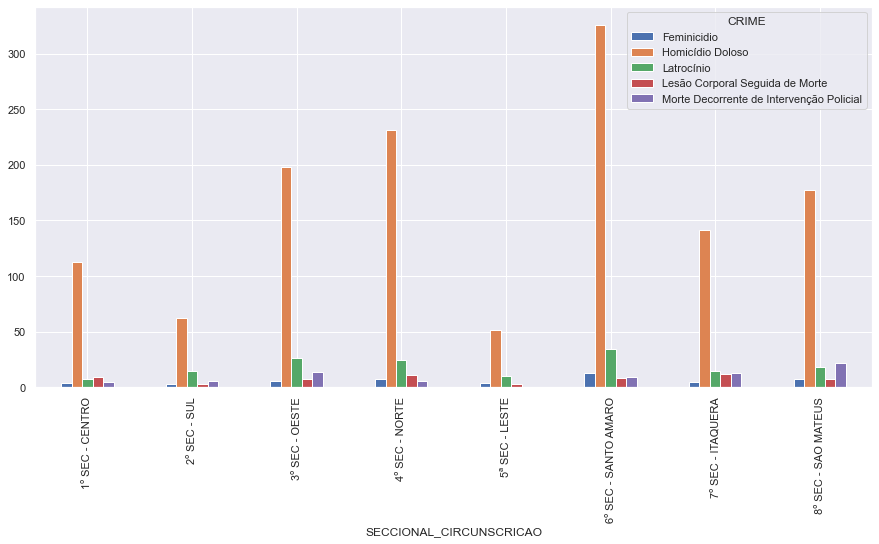

In [46]:
map_sec = {
    "1ª SEC" : "1º SEC - CENTRO",
    "DEL.SEC.1º CENTRO" : "1º SEC - CENTRO",
    "2ª SEC" : "2º SEC - SUL",
    "DEL.SEC.2º SUL" : "2º SEC - SUL",
    "3ª SEC" : "3º SEC - OESTE",
    "DEL.SEC.3º OESTE" : "3º SEC - OESTE",
    "4ª SEC" : "4º SEC - NORTE",
    "DEL.SEC.4º NORTE" : "4º SEC - NORTE",
    "5ª SEC" : "5ª SEC - LESTE",
    "DEL.SEC.5º LESTE " : "5º SEC - LESTE",
    "6ª SEC" : "6º SEC - SANTO AMARO",
    "DEL.SEC.6º SANTO AMARO" : "6º SEC - SANTO AMARO",
    "7ª SEC" : "7º SEC - ITAQUERA",
    "DEL.SEC.7º ITAQUERA" : "7º SEC - ITAQUERA",
    "8ª SEC" : "8º SEC - SAO MATEUS",
    "DEL.SEC.8º SAO MATEUS" : "8º SEC - SAO MATEUS"}

dfClean.SECCIONAL_CIRCUNSCRICAO = dfClean.SECCIONAL_CIRCUNSCRICAO.map(map_sec)
fig, ax = plt.subplots(figsize=(15,7))

sec_crimes = dfClean.groupby(['SECCIONAL_CIRCUNSCRICAO','CRIME']).size().unstack().plot(kind='bar',ax=ax)
sec_crimes



<AxesSubplot:xlabel='SEXO_PESSOA'>

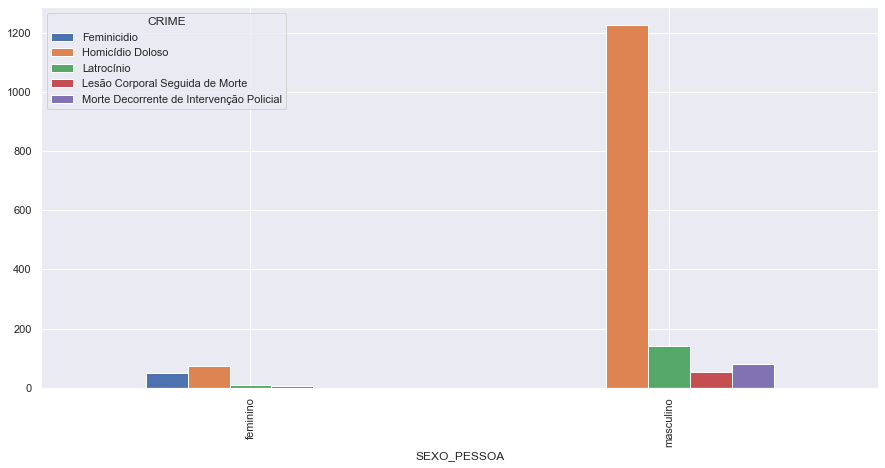

In [47]:
dfClean.SEXO_PESSOA = dfClean.SEXO_PESSOA.str.strip().str.lower()
fig, ax = plt.subplots(figsize=(15,7))
crimes_sexo = dfClean[dfClean['SEXO_PESSOA'].isin(['masculino','feminino'])].groupby(['SEXO_PESSOA','CRIME']).size().unstack().plot(kind='bar',ax=ax)
crimes_sexo

<AxesSubplot:xlabel='COR_PELE'>

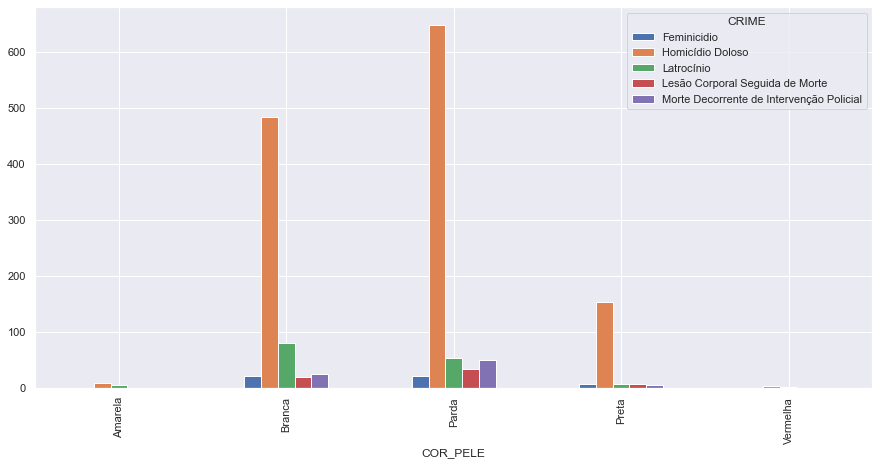

In [48]:
dfClean.COR_PELE = dfClean.COR_PELE.str.strip().replace({'Ignorada':'Ignorada/Não Informada','Não informada':'Ignorada/Não Informada'})
fig, ax = plt.subplots(figsize=(15,7))
crimes_cor = dfClean[dfClean['COR_PELE']!='Ignorada/Não Informada'].groupby(['COR_PELE','CRIME']).size().unstack().plot(kind='bar',ax=ax)
crimes_cor

<AxesSubplot:xlabel='ANO_BO', ylabel='Count'>

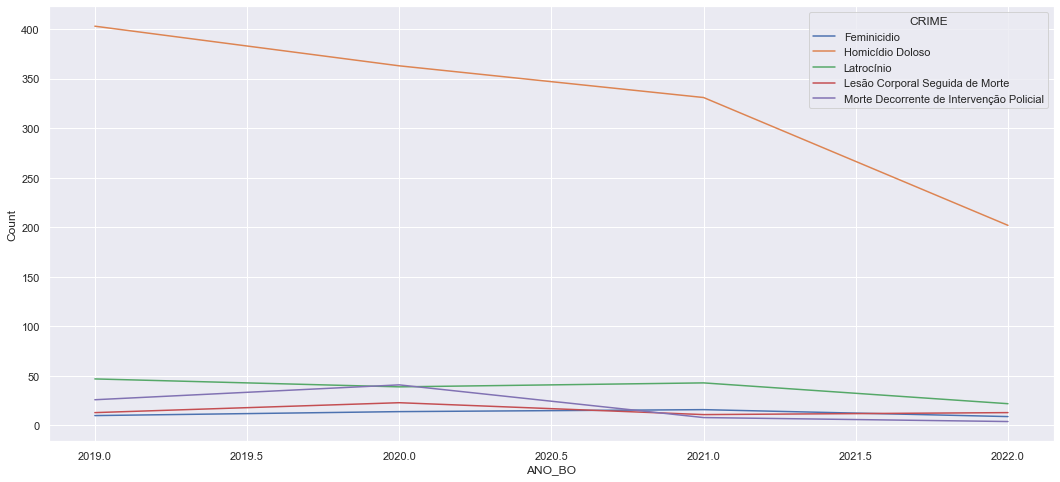

In [49]:
year_counts = dfClean.groupby(['ANO_BO','CRIME']).size().reset_index().rename(columns={0:'Count'})
# year_counts
sns.set(rc={'figure.figsize':(18,8)})
sns.lineplot(data=year_counts, x="ANO_BO", y="Count", hue="CRIME")

# x = list(year_counts.keys())
# y = list(year_counts.values)
# sns.barplot(x=x, y=y, palette="GnBu_d")
# plt.xticks(rotation=90)
# plt.title("Ano de Ocorrencia", fontdict = {'fontsize': 15})
# plt.ylabel("Frequência", fontdict={'fontsize': 15})
# plt.show()

<AxesSubplot:xlabel='MES_BO', ylabel='Count'>

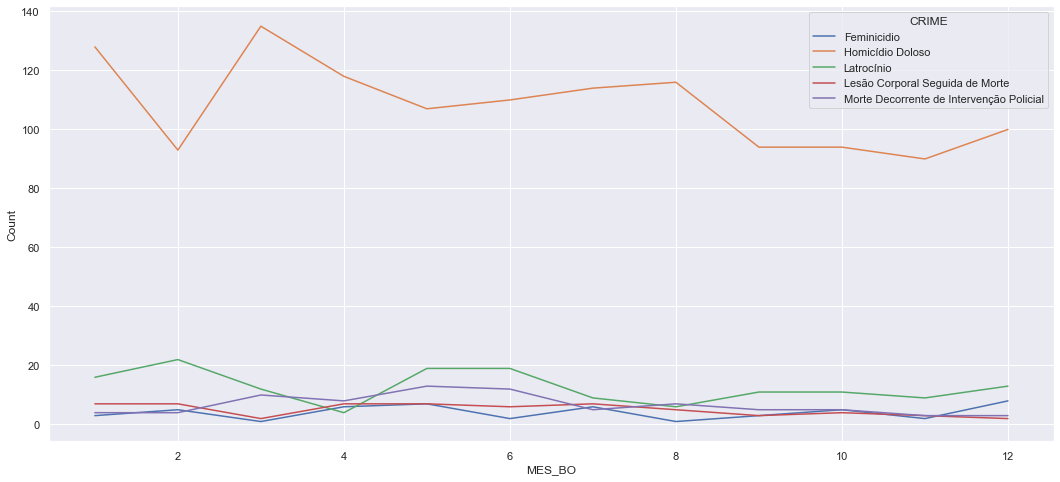

In [50]:
month_counts = dfClean.groupby(['MES_BO','CRIME']).size().reset_index().rename(columns={0:'Count'})

# month_counts
sns.set(rc={'figure.figsize':(18,8)})
sns.lineplot(data=month_counts, x="MES_BO", y="Count", hue="CRIME")


# x = list(month_counts.keys())
# y = list(month_counts.values)
# sns.barplot(x=x, y=y, palette="GnBu_d")
# plt.xticks(rotation=90)
# plt.title("Mês de Ocorrencia", fontdict = {'fontsize': 15})
# plt.ylabel("Frequência", fontdict={'fontsize': 15})
# plt.show()

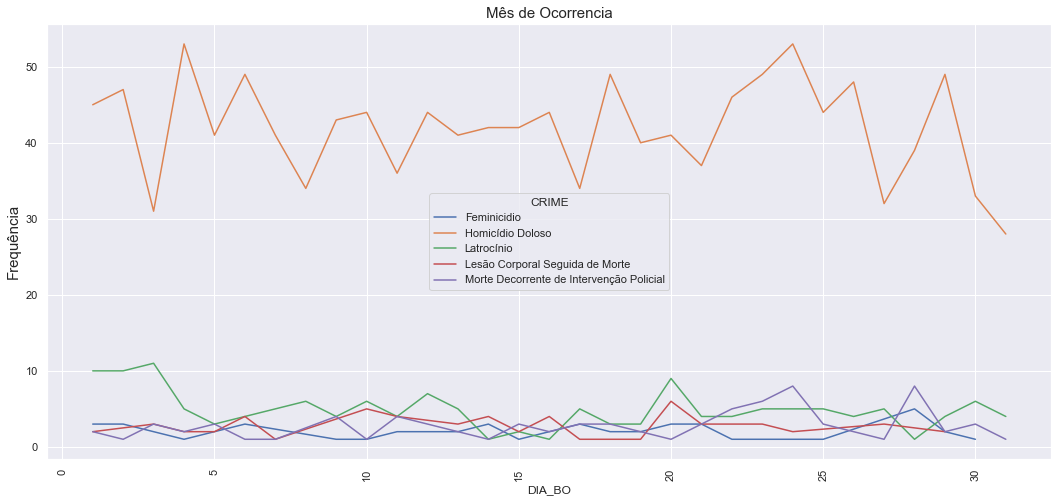

In [51]:
day_counts = dfClean.groupby(['DIA_BO','CRIME']).size().reset_index().rename(columns={0:'Count'})

# month_counts
sns.set(rc={'figure.figsize':(18,8)})
sns.lineplot(data=day_counts, x="DIA_BO", y="Count", hue="CRIME")


# x = list(month_counts.keys())
# y = list(month_counts.values)
# sns.barplot(x=x, y=y, palette="GnBu_d")
plt.xticks(rotation=90)
plt.title("Mês de Ocorrencia", fontdict = {'fontsize': 15})
plt.ylabel("Frequência", fontdict={'fontsize': 15})
plt.show()